<a href="https://colab.research.google.com/github/mohit-saini-2001/Fake_Vs_Real_News_Detection_NLP/blob/main/Fake_Vs_Real_News_Detector.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [4]:
#Import Libraries
import pandas as pd
import spacy
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.pipeline import Pipeline
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix

**Exploring DataSet**

In [5]:
true_df = pd.read_csv('True.csv')
true_df.head()

,title,text,subject,date
0,"As U.S. budget fight looms, Republicans flip t...",WASHINGTON (Reuters) - The head of a conservat...,politicsNews,"December 31, 2017"
1,U.S. military to accept transgender recruits o...,WASHINGTON (Reuters) - Transgender people will...,politicsNews,"December 29, 2017"
2,Senior U.S. Republican senator: 'Let Mr. Muell...,WASHINGTON (Reuters) - The special counsel inv...,politicsNews,"December 31, 2017"
3,FBI Russia probe helped by Australian diplomat...,WASHINGTON (Reuters) - Trump campaign adviser ...,politicsNews,"December 30, 2017"
4,Trump wants Postal Service to charge 'much mor...,SEATTLE/WASHINGTON (Reuters) - President Donal...,politicsNews,"December 29, 2017"


In [6]:
true_df["subject"].unique()

array(['politicsNews', 'worldnews'], dtype=object)

In [7]:
true_df["text"][1]

'WASHINGTON (Reuters) - Transgender people will be allowed for the first time to enlist in the U.S. military starting on Monday as ordered by federal courts, the Pentagon said on Friday, after President Donald Trump’s administration decided not to appeal rulings that blocked his transgender ban. Two federal appeals courts, one in Washington and one in Virginia, last week rejected the administration’s request to put on hold orders by lower court judges requiring the military to begin accepting transgender recruits on Jan. 1. A Justice Department official said the administration will not challenge those rulings. “The Department of Defense has announced that it will be releasing an independent study of these issues in the coming weeks. So rather than litigate this interim appeal before that occurs, the administration has decided to wait for DOD’s study and will continue to defend the president’s lawful authority in District Court in the meantime,” the official said, speaking on condition 

In [8]:
fake_df = pd.read_csv('Fake.csv')
fake_df.head(10)

,title,text,subject,date
0,Donald Trump Sends Out Embarrassing New Year’...,Donald Trump just couldn t wish all Americans ...,News,"December 31, 2017"
1,Drunk Bragging Trump Staffer Started Russian ...,House Intelligence Committee Chairman Devin Nu...,News,"December 31, 2017"
2,Sheriff David Clarke Becomes An Internet Joke...,"On Friday, it was revealed that former Milwauk...",News,"December 30, 2017"
3,Trump Is So Obsessed He Even Has Obama’s Name...,"On Christmas day, Donald Trump announced that ...",News,"December 29, 2017"
4,Pope Francis Just Called Out Donald Trump Dur...,Pope Francis used his annual Christmas Day mes...,News,"December 25, 2017"
5,Racist Alabama Cops Brutalize Black Boy While...,The number of cases of cops brutalizing and ki...,News,"December 25, 2017"
6,"Fresh Off The Golf Course, Trump Lashes Out A...",Donald Trump spent a good portion of his day a...,News,"December 23, 2017"
7,Trump Said Some INSANELY Racist Stuff Inside ...,In the wake of yet another court decision that...,News,"December 23, 2017"
8,Former CIA Director Slams Trump Over UN Bully...,Many people have raised the alarm regarding th...,News,"December 22, 2017"
9,WATCH: Brand-New Pro-Trump Ad Features So Muc...,Just when you might have thought we d get a br...,News,"December 21, 2017"


In [9]:
fake_df["subject"].unique()

array(['News', 'politics', 'Government News', 'left-news', 'US_News',
       'Middle-east'], dtype=object)

In [10]:
true_df.shape, fake_df.shape

((21417, 4), (23481, 4))

**Preprocessing DATA**

In [11]:
true_df.drop(columns=['subject', 'date','title'], inplace=True)
fake_df.drop(columns=['subject', 'date','title'], inplace=True)

In [12]:
true_df.head()

,text
0,WASHINGTON (Reuters) - The head of a conservat...
1,WASHINGTON (Reuters) - Transgender people will...
2,WASHINGTON (Reuters) - The special counsel inv...
3,WASHINGTON (Reuters) - Trump campaign adviser ...
4,SEATTLE/WASHINGTON (Reuters) - President Donal...


In [13]:
true_df.isna().sum(), fake_df.isna().sum()

(text    0
 dtype: int64,
 text    0
 dtype: int64)

In [14]:
# Adding Target Lable
true_df['lable'] = 0
fake_df['lable'] = 1

In [15]:
true = true_df.iloc[:5000]
fake = fake_df.iloc[:5000]

In [16]:
true.shape, fake.shape

((5000, 2), (5000, 2))

In [17]:
df = pd.concat([true, fake], axis = 0)

In [18]:
df.shape

(10000, 2)

**Text preprocessing**

In [19]:
nlp = spacy.load('en_core_web_sm')

In [20]:
def lemmatization(text ):
  doc = nlp(text)
  lemmaList = [word.lemma_ for word in doc]
  return " ".join(lemmaList)

In [21]:
df['lemma'] = df['text'].apply(lemmatization)

In [22]:
# Removing Stopword and Punctuation
def remove_stopword(text):
  doc = nlp(text)
  no_stopwords = [word.text for word in doc if not word.is_stop and not word.is_punct]
  return " ".join(no_stopwords)

In [ ]:
df['final'] = df['lemma'].apply(remove_stopword)

In [ ]:
df.drop(columns=['text', 'lemma'], inplace=True)

In [ ]:
x = df['final']
y = df['lable']

In [ ]:
X_train, X_test, y_train, y_test = train_test_split(x, y, test_size=0.2, random_state=42)

In [ ]:
X_train.shape, X_test.shape, y_train.shape, y_test.shape

**Model building**

In [45]:
classifier = Pipeline([
    ('tfidf', TfidfVectorizer()),
    ('clf', RandomForestClassifier(n_jobs=1, random_state=42))
])
classifier.fit(X_train, y_train)

Pipeline(steps=[('tfidf', TfidfVectorizer()),
                ('clf', RandomForestClassifier(n_jobs=1, random_state=42))])

In [36]:
classifier.score(X_test,y_test)

0.9985

In [37]:
pred= classifier.predict(X_test)

In [38]:
pred[:5]

array([1, 0, 0, 0, 0])

In [39]:
y_test[:5]

,lable
1252,1
4684,0
1731,0
4742,0
4521,0


In [40]:
print(f'model Accuracy: {accuracy_score(y_test, pred)}')

model Accuracy: 0.9985


In [41]:
print(classification_report(y_test,pred))

              precision    recall  f1-score   support

           0       1.00      1.00      1.00      1012
           1       1.00      1.00      1.00       988

    accuracy                           1.00      2000
   macro avg       1.00      1.00      1.00      2000
weighted avg       1.00      1.00      1.00      2000



Text(0.5, 1.0, 'Confusion Matrix for Real Vs Fake News')

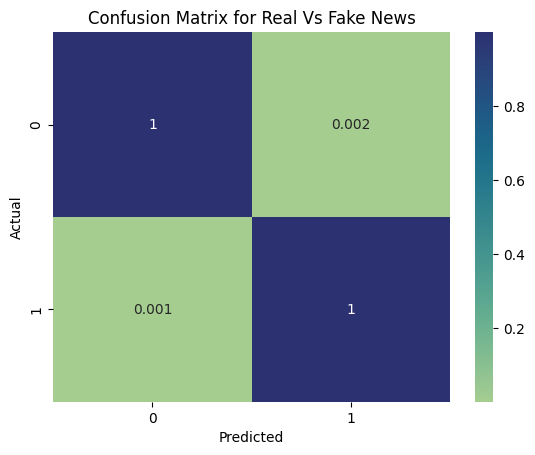

In [44]:
cf = confusion_matrix(y_test, pred, normalize = 'true')
sns.heatmap(cf, annot = True, cmap = 'crest')
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.title('Confusion Matrix for Real Vs Fake News')

# Fake News Detection

This Colab notebook demonstrates a process for building a fake news detection model using natural language processing techniques and a RandomForestClassifier.

## Notebook Overview

The notebook covers the following steps:

1.  **Import Libraries**: Imports necessary libraries including pandas, spacy, numpy, matplotlib, seaborn, and scikit-learn modules for text processing, modeling, and evaluation.
2.  **Exploring DataSet**: Loads and explores two datasets, "True.csv" and "Fake.csv", to understand their structure and content.
3.  **Preprocessing Data**:
    *   Drops irrelevant columns (`subject`, `date`, `title`) from both dataframes.
    *   Checks for missing values.
    *   Adds a target label (`lable`) to each dataframe (0 for true news, 1 for fake news).
    *   Concatenates the true and fake news dataframes.
4.  **Text preprocessing**:
    *   Loads the spaCy English language model (`en_core_web_sm`).
    *   Defines functions for lemmatization and stopword/punctuation removal.
    *   Applies lemmatization and stopword/punctuation removal to the text data, creating a new column `final`.
    *   Drops the original `text` and `lemma` columns.
5.  **Model building**:
    *   Splits the data into training and testing sets.
    *   Creates a machine learning pipeline using `TfidfVectorizer` for text feature extraction and `RandomForestClassifier` for classification.
    *   Trains the pipeline on the training data.
    *   Evaluates the model's performance using accuracy score, classification report, and confusion matrix.

## Dataset

The notebook uses two CSV files:

*   `True.csv`: Contains true news articles.
*   `Fake.csv`: Contains fake news articles.

These files are expected to be present in the same directory as the notebook or the specified file paths.

## Model Performance

The trained model achieves a high accuracy score, as shown in the confusion matrix and classification report.

## Dependencies

The following libraries are required to run this notebook:

*   pandas
*   spacy
*   numpy
*   matplotlib
*   seaborn
*   scikit-learn

These dependencies are imported in the first cell of the notebook.

## Usage

1.  Upload the `True.csv` and `Fake.csv` files to your Colab environment.
2.  Run all the cells in the notebook sequentially.
3.  The output will show the model's performance metrics and a confusion matrix visualization.